# Pymaceuticals Inc.
---

### Analysis

- Of the 4 most promising treatments, Capo and Ramicane appear to be the most successful. They are also quite similar in terms of range, means, and medians of final tumor volumes.

- Based on analysis of mouse l509, Capomulin was remarkably effective between days 20 to 35, where the tumor volume saw a decrease of 5%.

- This result shows that, even amongst the most promising of treatments, these drugs are not eliminating cancers as much as slightly decreasing their mass.

In [547]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
from scipy.stats import sem
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')


# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [548]:
# Checking the number of mice.
mouse_study["Mouse ID"].nunique()

249

In [549]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#https://www.statology.org/pandas-find-duplicates/
duplicate_mouse = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [550]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study_clean = mouse_study.drop(mouse_study[mouse_study['Mouse ID'] == "g989"].index)
mouse_study_clean



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [551]:
# Checking the number of mice in the clean DataFrame.

mouse_study_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [552]:
# Generate a summary statistics table of mean, median, variance('Tumor Volume (mm3)', standard deviation, and SEM of the tumor volume for each regimen



#Generate the means for each regimen
Ram_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ramicane", 'Tumor Volume (mm3)'].mean()
Cap_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Capomulin", 'Tumor Volume (mm3)'].mean()
Cef_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ceftamin", 'Tumor Volume (mm3)'].mean()
Inf_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Infubinol", 'Tumor Volume (mm3)'].mean()
Pla_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Placebo", 'Tumor Volume (mm3)'].mean()
Ste_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Stelasyn", 'Tumor Volume (mm3)'].mean()
Zon_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Zoniferol", 'Tumor Volume (mm3)'].mean()
Ket_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ketapril", 'Tumor Volume (mm3)'].mean()
Pro_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Propriva", 'Tumor Volume (mm3)'].mean()
Naf_mean = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Naftisol", 'Tumor Volume (mm3)'].mean()

#Gather the data into a list
Tumor_mean = (Ram_mean, Cap_mean, Cef_mean, Inf_mean, Pla_mean, Ste_mean, Zon_mean, Ket_mean, Pro_mean, Naf_mean)

#Generate the median for each regimen
Ram_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ramicane", 'Tumor Volume (mm3)'].median()
Cap_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Capomulin", 'Tumor Volume (mm3)'].median()
Cef_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ceftamin", 'Tumor Volume (mm3)'].median()
Inf_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Infubinol", 'Tumor Volume (mm3)'].median()
Pla_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Placebo", 'Tumor Volume (mm3)'].median()
Ste_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Stelasyn", 'Tumor Volume (mm3)'].median()
Zon_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Zoniferol", 'Tumor Volume (mm3)'].median()
Ket_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ketapril", 'Tumor Volume (mm3)'].median()
Pro_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Propriva", 'Tumor Volume (mm3)'].median()
Naf_med = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Naftisol", 'Tumor Volume (mm3)'].median()

#Gather the data into a list
Tumor_med = (Ram_med, Cap_med, Cef_med, Inf_med, Pla_med, Ste_med, Zon_med, Ket_med, Pro_med, Naf_med)

#Generate the variance for each regimen
Ram_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ramicane", 'Tumor Volume (mm3)'].var()
Cap_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Capomulin", 'Tumor Volume (mm3)'].var()
Cef_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ceftamin", 'Tumor Volume (mm3)'].var()
Inf_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Infubinol", 'Tumor Volume (mm3)'].var()
Pla_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Placebo", 'Tumor Volume (mm3)'].var()
Ste_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Stelasyn", 'Tumor Volume (mm3)'].var()
Zon_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Zoniferol", 'Tumor Volume (mm3)'].var()
Ket_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ketapril", 'Tumor Volume (mm3)'].var()
Pro_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Propriva", 'Tumor Volume (mm3)'].var()
Naf_v = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Naftisol", 'Tumor Volume (mm3)'].var()

#Gather the data into a list
Tumor_v = (Ram_v, Cap_v, Cef_v, Inf_v, Pla_v, Ste_v, Zon_v, Ket_v, Pro_v, Naf_v)

#Generate the standard deviation for each regimen
Ram_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ramicane", 'Tumor Volume (mm3)'].std()
Cap_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Capomulin", 'Tumor Volume (mm3)'].std()
Cef_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ceftamin", 'Tumor Volume (mm3)'].std()
Inf_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Infubinol", 'Tumor Volume (mm3)'].std()
Pla_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Placebo", 'Tumor Volume (mm3)'].std()
Ste_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Stelasyn", 'Tumor Volume (mm3)'].std()
Zon_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Zoniferol", 'Tumor Volume (mm3)'].std()
Ket_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ketapril", 'Tumor Volume (mm3)'].std()
Pro_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Propriva", 'Tumor Volume (mm3)'].std()
Naf_sdv = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Naftisol", 'Tumor Volume (mm3)'].std()

#Gather the data into a list
Tumor_sdv = (Ram_sdv, Cap_sdv, Cef_sdv, Inf_sdv, Pla_sdv, Ste_sdv, Zon_sdv, Ket_sdv, Pro_sdv, Naf_sdv)

#Generate the standard error for each regimen
Ram_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ramicane", 'Tumor Volume (mm3)'].sem()
Cap_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Capomulin", 'Tumor Volume (mm3)'].sem()
Cef_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ceftamin", 'Tumor Volume (mm3)'].sem()
Inf_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Infubinol", 'Tumor Volume (mm3)'].sem()
Pla_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Placebo", 'Tumor Volume (mm3)'].sem()
Ste_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Stelasyn", 'Tumor Volume (mm3)'].sem()
Zon_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Zoniferol", 'Tumor Volume (mm3)'].sem()
Ket_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ketapril", 'Tumor Volume (mm3)'].sem()
Pro_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Propriva", 'Tumor Volume (mm3)'].sem()
Naf_sem = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Naftisol", 'Tumor Volume (mm3)'].sem()

#Gather the data into a list
Tumor_sem = (Ram_sem, Cap_sem, Cef_sem, Inf_sem, Pla_sem, Ste_sem, Zon_sem, Ket_sem, Pro_sem, Naf_sem)
Summary_data = {"mean": Tumor_mean,
                "med": Tumor_med,
                "var":Tumor_v,
                "std":Tumor_sdv,
                "sem":Tumor_sem}


Tumor_summary = pd.DataFrame(Summary_data, index = Regimen)

Tumor_summary


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,mean,med,var,std,sem
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.591172,51.776157,39.290177,6.268188,0.469821
Placebo,52.884795,51.820584,43.128684,6.567243,0.492236
Ceftamin,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

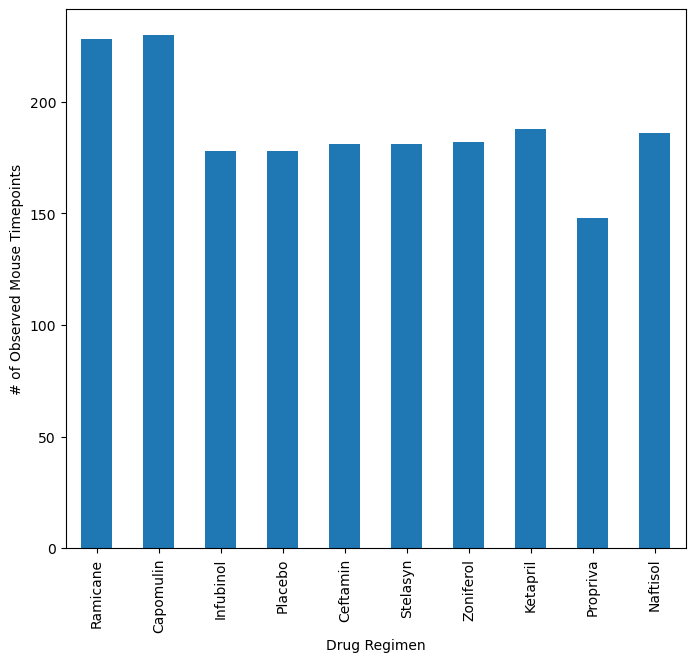

In [553]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Find the number of timepoints for each Regimen

Ram_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ramicane", 'Timepoint'].count()
Cap_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Capomulin", 'Timepoint'].count()
Cef_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ceftamin", 'Timepoint'].count()
Inf_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Infubinol", 'Timepoint'].count()
Pla_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Placebo", 'Timepoint'].count()
Ste_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Stelasyn", 'Timepoint'].count()
Zon_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Zoniferol", 'Timepoint'].count()
Ket_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Ketapril", 'Timepoint'].count()
Pro_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Propriva", 'Timepoint'].count()
Naf_t = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=="Naftisol", 'Timepoint'].count()

Mousepoints = (Ram_t, Cap_t, Cef_t, Inf_t, Pla_t, Ste_t, Zon_t, Ket_t, Pro_t, Naf_t)

bar_df = pd.DataFrame(Mousepoints, index = Regimen)
#bar_df.rename(columns = { "O":"Timepoints"}, inplace=True)


bar_df.plot(kind = 'bar', figsize = (8,7), xlabel = 'Drug Regimen', ylabel = "# of Observed Mouse Timepoints", legend = None)


plt.tight_layout
plt.show()

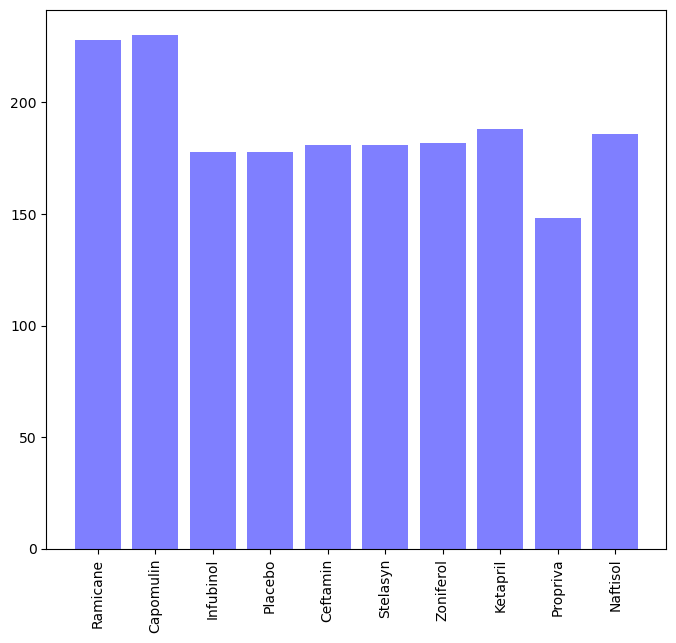

In [554]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(Regimen))
ticker_locations = [value for value in x_axis]

plt.figure(figsize=(8,7))
plt.bar(x_axis, bar_df[0], color='b', alpha=0.5, align="center")
plt.xticks(ticker_locations, Regimen, rotation="vertical")
plt.show()

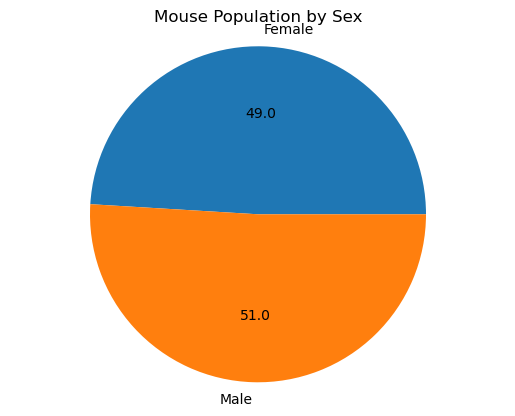

In [555]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#https://stackoverflow.com/questions/63687789/how-do-i-create-a-pie-chart-using-categorical-data-in-matplotlib


mouse_study_clean.groupby('Sex').size().plot(kind='pie', autopct='%.1f')
plt.title("Mouse Population by Sex")
plt.axis("equal")
plt.show()






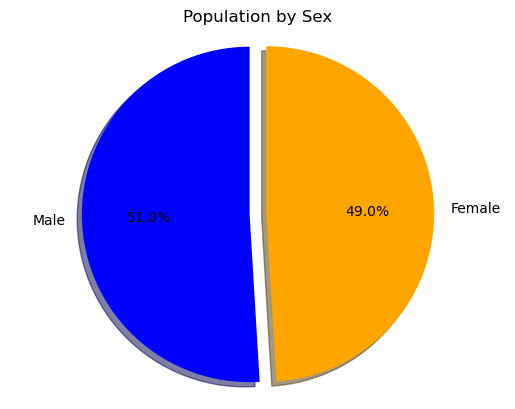

In [557]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


male_mice = mouse_study_clean["Sex"].value_counts()['Male']
female_mice = mouse_study_clean["Sex"].value_counts()['Female']


mice = (male_mice, female_mice)

colors = ["blue","orange"]
explode = (0.10, 0.0)
plt.title("Population by Sex")
plt.pie(mice, explode=explode, labels=('Male','Female'), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [558]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Thanks Matt for your help!

# Start by getting the last (greatest) timepoint for each mouse
mouseid_group = mouse_study_clean.groupby("Mouse ID")

bigtime = pd.DataFrame(mouse_study_clean.groupby('Mouse ID').max()['Timepoint'])



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

bigtime = pd.merge(bigtime, mouse_study_clean, how = 'left', on = ["Mouse ID", "Timepoint"])



In [545]:
# Put treatments into a list for for loop (and later for plot labels)
#Thanks Matt for your help!
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []

for treatment in treatments:

    tumorvol.append(bigtime.loc[mouse_tumors['Drug Regimen']== treatment]["Tumor Volume (mm3)"])
    
    #add subset
    
    subset = bigtime.loc[mouse_tumors['Drug Regimen']==treatment]["Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    median = quartiles[0.5]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = subset.loc[(subset < lower_bound) | (subset > upper_bound)]

    



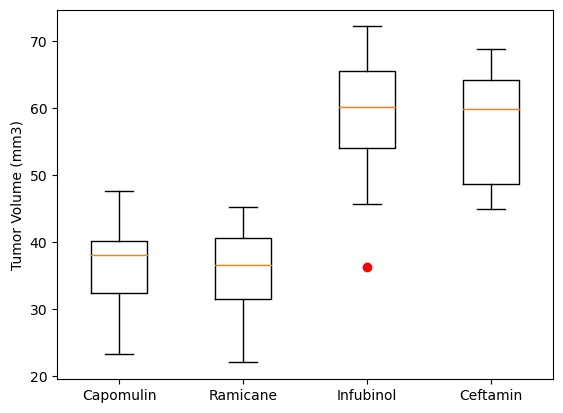

In [564]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumorvol, labels = treatments, sym = 'ro')
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

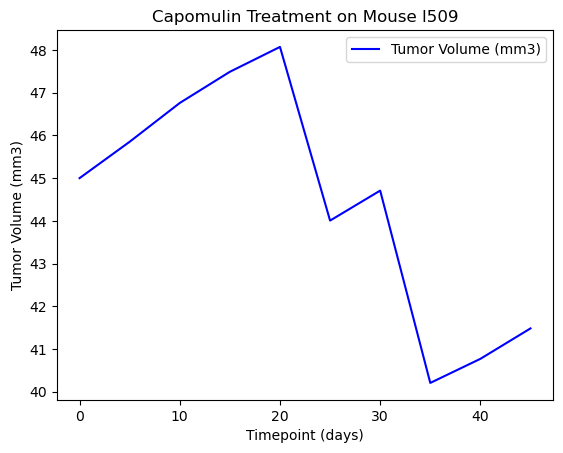

In [565]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_unique = mouse_study_clean.loc[mouse_study_clean["Mouse ID"]== 'l509']
mouse_unique = mouse_unique.set_index('Timepoint')


mouse_unique.plot(y = 'Tumor Volume (mm3)', color = "b")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Capomulin Treatment on Mouse l509')
plt.legend(loc='best')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

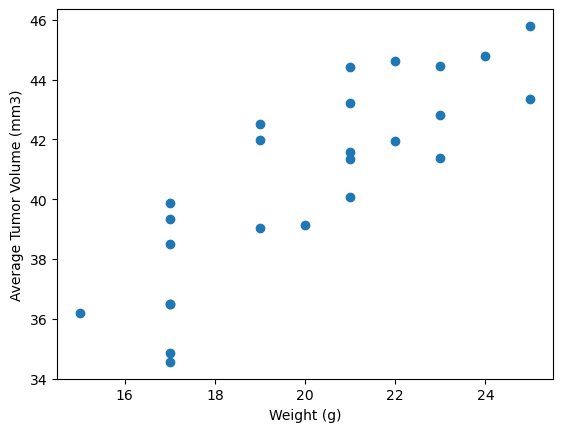

In [588]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# https://stackoverflow.com/questions/44614357/python-pandas-how-to-compute-on-rows-with-same-index-values

Capo_mouse = mouse_study_clean.loc[mouse_study_clean['Drug Regimen']=='Capomulin']
Capo_mouse = Capo_mouse.sort_values("Drug Regimen", ascending=True)


#Capo_mouse = Capo_mouse.set_index('Mouse ID')
Ind_mice = Capo_mouse['Mouse ID'].unique()
Ind_mice_weight = Capo_mouse['Weight (g)'].unique()
Capo_mouse = Capo_mouse.set_index('Mouse ID')
Capo_mouse = Capo_mouse.sort_index()
Capo_mouse = Capo_mouse[['Weight (g)', 'Tumor Volume (mm3)']]

#Capo_mouse = Capo_mouse.sort_values("Weight (g)", ascending=False)

Capo_new = Capo_mouse.groupby(level=0)
Capo_data = Capo_new.agg({'Tumor Volume (mm3)':'mean'})

Capo_scat = pd.merge(Capo_mouse, Capo_data, on = 'Mouse ID', how = 'outer')

#Ind_mice
del Capo_scat['Tumor Volume (mm3)_x']
Capo_scat = Capo_scat.drop_duplicates(keep='first')
Capo_scat = Capo_scat.set_index('Weight (g)')

plt.scatter(y = Capo_scat, x = Capo_scat.index)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")




## Correlation and Regression

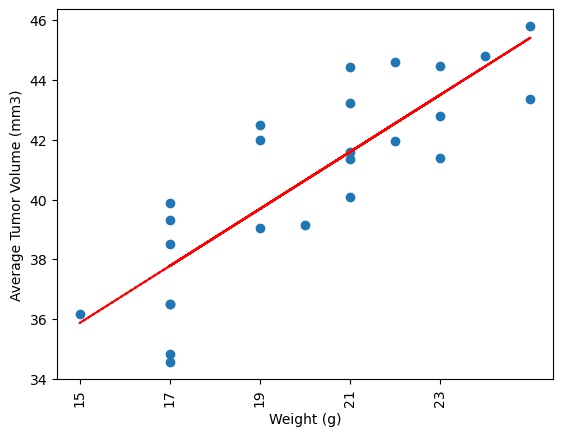

0.8419363424694722


In [599]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


Y=Capo_scat["Tumor Volume (mm3)_y"].values
X=Capo_scat.index


Ca_slope, Ca_int, Ca_r, Ca_p, Ca_std_err = stats.linregress(x = X, y = Y)

Ca_fit = Ca_slope * X + Ca_int



x_dim = np.arange(15, 25, 2)
plt.scatter(X, Y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(X,Ca_fit,"--", color = 'r')
plt.xticks(x_dim, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(Ca_r)

In [610]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


print("The correlation coefficient for the linear regression between mouse weight in grams and tumor volume in mm3 is " + str(round(Ca_r, 4)) + ".")

The correlation coefficient for the linear regression between mouse weight in grams and tumor volume in mm3 is 0.8419.
